# Gradient Boosting Machine - Parameter Tuning

Based on: https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [11]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV

In [13]:
train = pd.read_csv('train_modified.csv')

In [14]:
target = 'Disbursed'
IDcol = 'ID'

In [15]:
def modelfit(alg, dtrain, predictors, performCV=True, 
             printFeatureImportance = True, cv_folds = 5):
    alg.fit(dtrain[predictors], dtrain[target])
    
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:, 1]
    
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain['Disbursed'], cv=cv_folds, scoring='roc_auc')
        
        #Print model report:
    print "\nModel Report"
    print "Accuracy : %.4g" % metrics.accuracy_score(dtrain['Disbursed'].values, dtrain_predictions)
    print "AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Disbursed'], dtrain_predprob)
    
    if performCV:
        print "CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

In [16]:
predictors = [x for x in train.columns if x not in [target, IDcol]]


Model Report
Accuracy : 0.9856
AUC Score (Train): 0.862264
CV Score : Mean - 0.8318589 | Std - 0.008756969 | Min - 0.820805 | Max - 0.8438558


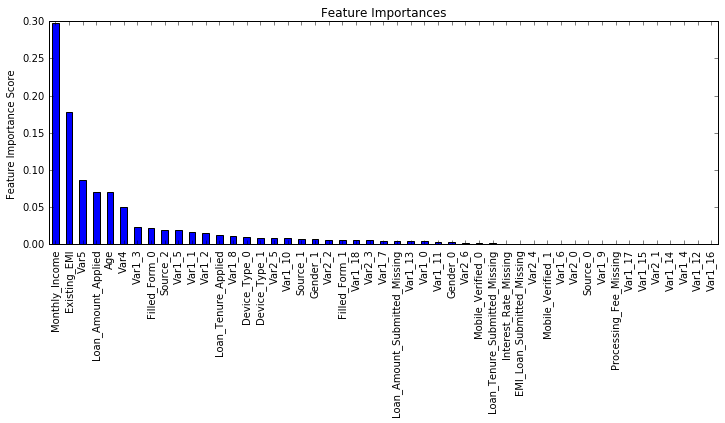

In [21]:
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, train, predictors)

In [22]:
#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in [target, IDcol]]
param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch1.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=8, max_features='sqrt', max_leaf_nodes=None,
              min_samples_leaf=50, min_samples_split=500,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'n_estimators': [20, 30, 40, 50, 60, 70, 80]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [24]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.83322, std: 0.00985, params: {'n_estimators': 20},
  mean: 0.83684, std: 0.00986, params: {'n_estimators': 30},
  mean: 0.83752, std: 0.00978, params: {'n_estimators': 40},
  mean: 0.83761, std: 0.00991, params: {'n_estimators': 50},
  mean: 0.83843, std: 0.00987, params: {'n_estimators': 60},
  mean: 0.83832, std: 0.00956, params: {'n_estimators': 70},
  mean: 0.83764, std: 0.01001, params: {'n_estimators': 80}],
 {'n_estimators': 60},
 0.83842766395593704)

In [25]:
param_test2 = {'max_depth':range(5,20, 5), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(train[predictors],train[target])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.83256, std: 0.01272, params: {'min_samples_split': 200, 'max_depth': 5},
  mean: 0.83285, std: 0.01016, params: {'min_samples_split': 400, 'max_depth': 5},
  mean: 0.83386, std: 0.01415, params: {'min_samples_split': 600, 'max_depth': 5},
  mean: 0.83379, std: 0.01169, params: {'min_samples_split': 800, 'max_depth': 5},
  mean: 0.83338, std: 0.01268, params: {'min_samples_split': 1000, 'max_depth': 5},
  mean: 0.83188, std: 0.01088, params: {'min_samples_split': 200, 'max_depth': 10},
  mean: 0.83335, std: 0.00920, params: {'min_samples_split': 400, 'max_depth': 10},
  mean: 0.83408, std: 0.00994, params: {'min_samples_split': 600, 'max_depth': 10},
  mean: 0.83356, std: 0.00669, params: {'min_samples_split': 800, 'max_depth': 10},
  mean: 0.83731, std: 0.01160, params: {'min_samples_split': 1000, 'max_depth': 10},
  mean: 0.82009, std: 0.00691, params: {'min_samples_split': 200, 'max_depth': 15},
  mean: 0.82317, std: 0.01017, params: {'min_samples_split': 400, 'max_depth': 

In [ ]:
param_test3 = {'min_samples_split':range(1000,2100,200), 'min_samples_leaf':range(30,71,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9,max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(train[predictors],train[target])
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

In [ ]:
param_test4 = {'max_features':range(7,20,2)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9, min_samples_split=1200, min_samples_leaf=60, subsample=0.8, random_state=10),
param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(train[predictors],train[target])
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

In [ ]:
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9,min_samples_split=1200, min_samples_leaf=60, subsample=0.8, random_state=10,max_features=7),
param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(train[predictors],train[target])
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_


Model Report
Accuracy : 0.9854
AUC Score (Train): 0.906346


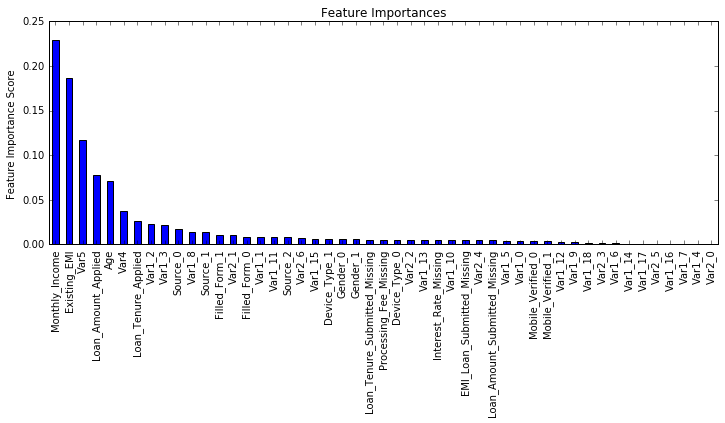

In [26]:
gbm_tuned_4 = GradientBoostingClassifier(learning_rate=0.005, n_estimators=1500,max_depth=9, min_samples_split=1200, min_samples_leaf=60, subsample=0.85, random_state=10, max_features=7, warm_start=True)
modelfit(gbm_tuned_4, train, predictors, performCV=False)